
# Dimensionality Reduction

**Learning Objectives**
- Explain why dimensionality reduction (DR) is useful for modeling and visualization.
- Understand PCA and LDA conceptually and mathematically, with all symbols defined.
- Work a tiny numerical example by hand for PCA and LDA to see each step.
- Use PCA and LDA in Python to transform data, visualize, and interpret explained variance and class separation.
- Contrast feature selection and feature extraction; practice quick selection methods.
- Feel the curse of dimensionality and why DR helps; compare pipelines with and without DR.


## Why Dimensionality Reduction?

As data scientists, we often deal with datasets that have **many features (columns)** — sometimes dozens, sometimes thousands.  
At first this seems great: more information should mean better predictions.  
But in practice, high dimensionality can quietly become a trap.

### The Problems of High Dimensionality

1. **Overfitting**  
   When the number of features is large compared to the number of samples, the model may fit noise instead of signal.  
   *Example:* imagine predicting student success from **1,000 behavioral variables** collected from only **200 students**.  
   The model can always find some pattern that perfectly separates the training data, but those “patterns” will vanish on new data.

2. **Computation and Storage**  
   Every additional feature adds more parameters to estimate and more memory to process.  
   Training a linear model with 10 features is fast; with 10,000 features it can become painfully slow — even if most features add no value.

3. **Visualization and Human Understanding**  
   We can easily plot in two or three dimensions — but how do we *see* 50 or 500 dimensions?  
   Visualization becomes impossible without projection techniques.  
   For instance, if our student dataset has features like **study hours**, **attendance**, **quiz scores**, and **assignment grades**, we can plot 2D combinations but may miss multivariate patterns unless we reduce dimensions.

4. **The Curse of Dimensionality**  
   As the number of dimensions increases, the data points become sparse and distances between them become less meaningful.  
   A student who looks “close” to another in a 2-feature plot may be far apart in a 50-feature space.  
   Many algorithms — especially clustering and nearest neighbors — break down under this sparsity.



### What Dimensionality Reduction Does

**Dimensionality Reduction (DR)** techniques transform data into a smaller number of **informative dimensions**.  
The goal is to retain the essential structure or separability while discarding redundancy and noise.

Two main strategies are used:

- **Feature Selection** – Choose the most useful original features.  
  *Example:* selecting only **attendance** and **quiz average** as predictors of success if they explain most of the variance.

  But what does *“explain most of the variance”* really mean?

  In machine learning, **variance** measures how much a feature’s values spread out from their mean.  
  Features with **high variance** typically carry more information because they help differentiate samples — the feature actually *changes* across individuals.  
  Conversely, features with **very low variance** (for example, everyone’s attendance rate being around 95%) contribute little to distinguishing students; they are nearly constant.

  Imagine plotting two features for 100 students:
  - *Study hours* vary widely from 1 to 12 hours per week.  
  - *Lab coat color* never changes — everyone wears white.

  Which feature tells you more about who is likely to pass?  
  The one with higher variance (study hours), because it reflects meaningful differences among students.

  **Variance, in short, is a signal-to-information clue.**  
  PCA uses it as a guide to find directions in the data where points spread out the most — the directions along which the data “tells a story.”  
  These directions become the new, more informative axes (principal components) for analysis or visualization.


- **Feature Extraction** – Create new composite features that summarize the originals.  
  *Example:* combining **hours studied**, **quizzes**, and **assignments** into a single *academic performance index* using **Principal Component Analysis (PCA)**, or combining features to maximize class separation using **Linear Discriminant Analysis (LDA)**.



### Preview: PCA and LDA

In this module we will study two foundational dimensionality reduction methods — **PCA** and **LDA**.
 
- **Principal Component Analysis (PCA)**  
  PCA is an *unsupervised* method. It looks for directions (called *principal components*) where the data varies the most.  
  These components are linear combinations of the original features.  
  We will see how PCA uses linear algebra—specifically, eigenvalues and eigenvectors—to find these directions. If you need a refresher on these concepts, see [this video](https://www.youtube.com/watch?v=PFDu9oVAE-g&t=73s).


- **Linear Discriminant Analysis (LDA)**  
  LDA is a *supervised* method. It looks for directions that best separate known classes (for example, “Pass” vs. “Fail”).  
  Instead of capturing maximum variance, LDA maximizes the ratio of *between-class variance* to *within-class variance*, creating a projection that improves classification.

Both methods reduce the dimensionality of the feature space, but their goals are different:
- PCA captures *information* (variance) without using labels.  
- LDA captures *discrimination* (class separability) using labels.



### Why It Matters

We use dimensionality reduction to:
- **Simplify models:** fewer inputs mean less risk of overfitting.  
- **Reduce noise:** DR filters out irrelevant or redundant information.  
- **Speed up computation:** smaller feature spaces train faster.  
- **Enable visualization:** projecting data into 2D or 3D reveals structure and clusters that are otherwise invisible.

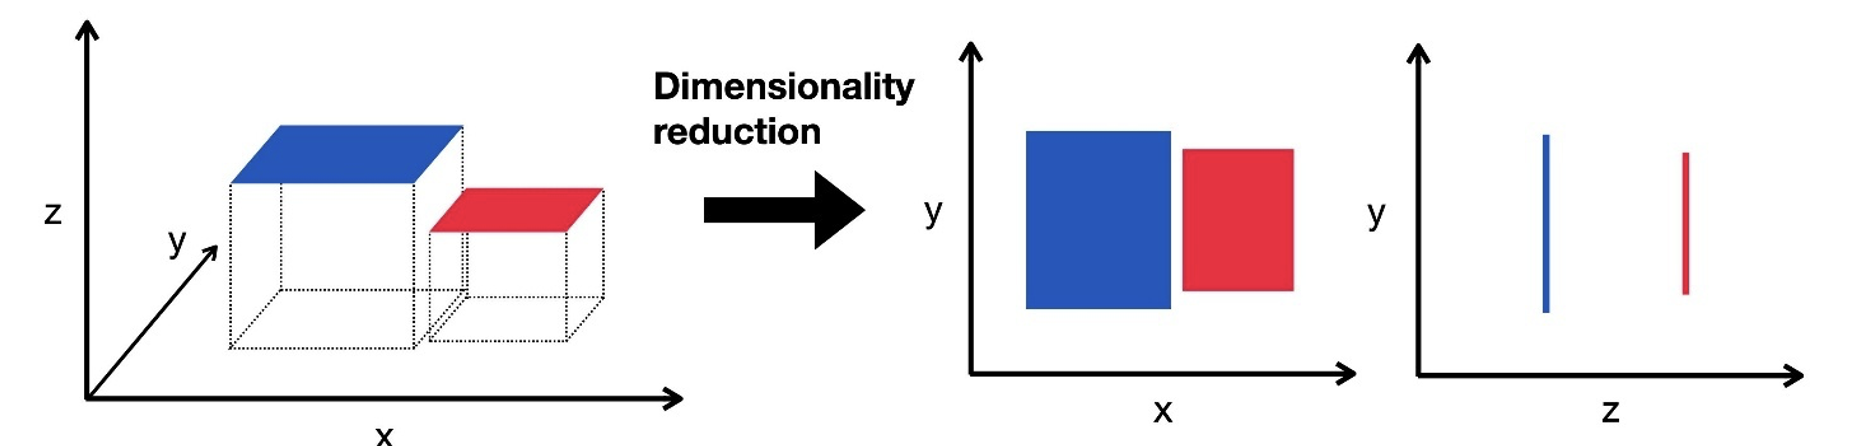

A practical rule of thumb:  
> If a model has thousands of features but only hundreds of samples, dimensionality reduction is not optional — it’s survival.

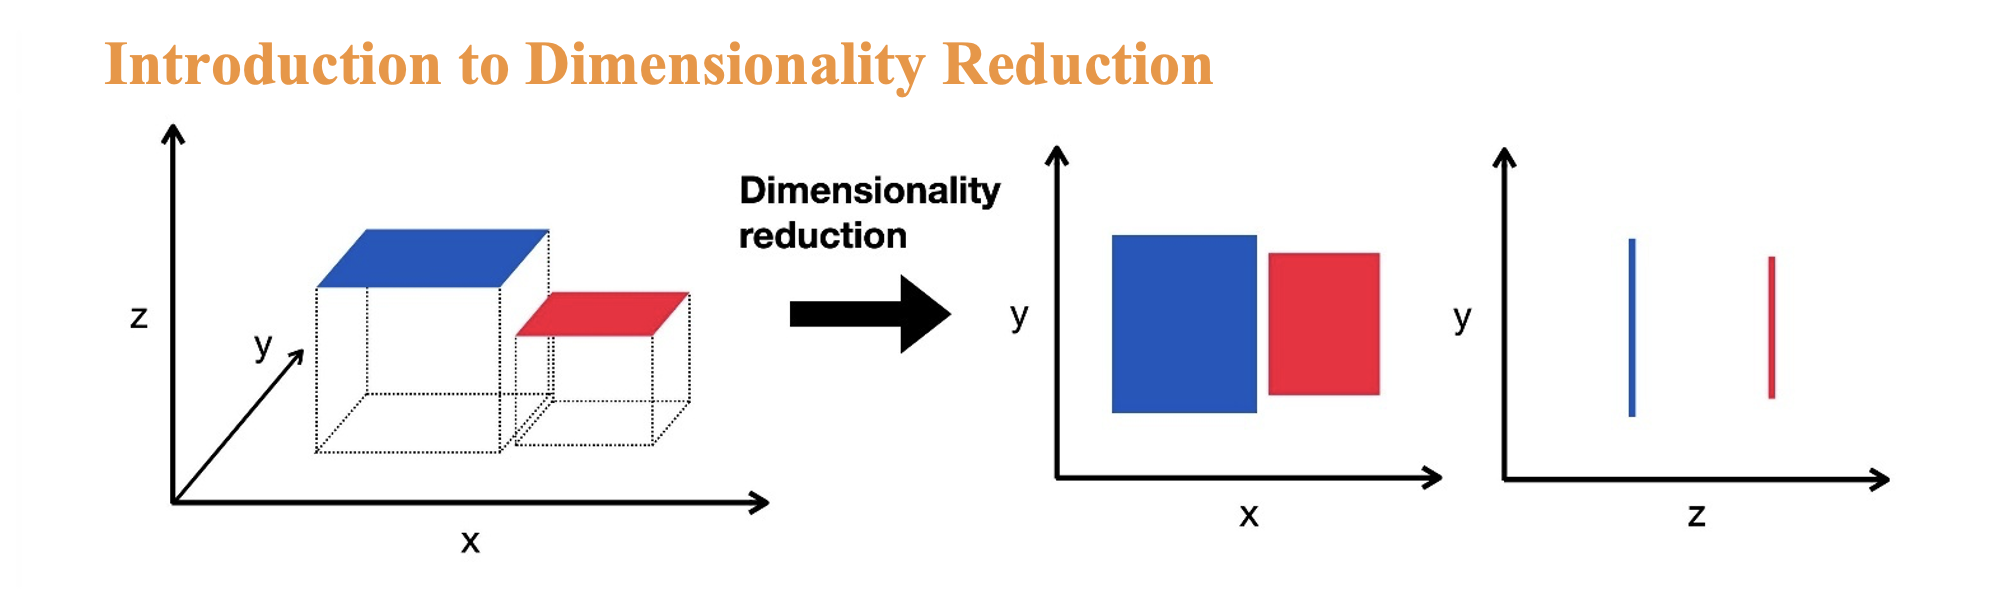

## Principal Component Analysis (PCA): Concept

**Principal Component Analysis (PCA)** is an **unsupervised** technique used to discover the main patterns of variation in data.  
It looks for new axes — called **principal components (PCs)** — that summarize how the data spreads out.  
These new axes are linear combinations of the original features (for example, hours studied, attendance, quiz scores).

---

### The Idea Behind PCA

Think of your dataset as a cloud of points in a high-dimensional space.  
Each point represents one observation (for example, one student), and each coordinate represents a feature.

PCA rotates this space to find **new coordinate axes** that:
1. Capture as much of the data’s variance (spread) as possible.
2. Are mutually **orthogonal** (independent) so that each new axis represents new, non-overlapping information.

---

### Understanding PC1 and PC2

- **PC1 (First Principal Component):**  
  This is the single direction in the feature space along which the data varies the most.  
  It’s like finding the “longest stretch” of the data cloud — the direction that explains the largest share of total variance.  
  If students’ *hours studied* and *quiz averages* are strongly correlated, PC1 may represent a combined “academic effort” axis summarizing both.

- **PC2 (Second Principal Component):**  
  Once PC1 is chosen, PC2 is the next direction that captures the largest *remaining* variance, **subject to being perpendicular (orthogonal) to PC1**.  
  It often represents a contrasting or complementary pattern in the data.  
  Continuing the example, PC2 might represent something different — for instance, *attendance versus study hours* balance — capturing variation that PC1 missed.

Together, PC1 and PC2 can often explain most of the dataset’s structure, which is why we usually visualize data on these two axes.

---

### A Simple Example

Suppose we have two features for 10 students:
| Student | Hours Studied | Quiz Average |
|----------|----------------|---------------|
| A | 2 | 55 |
| B | 3 | 60 |
| C | 5 | 70 |
| D | 6 | 72 |
| E | 8 | 85 |
| F | 9 | 88 |
| G | 10 | 92 |
| H | 4 | 68 |
| I | 7 | 80 |
| J | 1 | 50 |

Notice how **hours studied** and **quiz average** move together — when one increases, so does the other.  
The data mostly varies along a single direction: the “study more, score higher” trend.  
PCA identifies that direction as **PC1**, which captures nearly all the variance.  
A possible **PC2** could capture small residual differences — maybe random quiz fluctuations at the same study level.

If we plot these points:
- The PC1 axis would stretch diagonally across the cloud of points (representing increasing study effort and performance).
- The PC2 axis would be perpendicular to it, explaining minor deviations from that trend.

---

### Why It Matters

By projecting the data onto PC1 and PC2, we can:
- **Visualize** multidimensional data in 2D.
- **Remove noise** and redundancy.
- **Prepare data** for other models that perform better on uncorrelated, lower-dimensional inputs.

Typical applications include:
- Reducing hundreds of correlated financial indicators to a few main trends.
- Summarizing hundreds of image pixels into a handful of features for pattern recognition.
- Compressing student performance data into a few interpretable academic “factors.”

In short, **PCA finds the most informative directions in your data — the directions that tell the strongest story.**


### PCA Mathematics Through an Example (Hours Studied and Attendance)

We will learn PCA by doing it on a tiny, sensible dataset.  
Suppose we track **Hours Studied** and **Attendance (%)** for four students:

| Student | Hours | Attendance |
|--------:|------:|-----------:|
| A       | 2     | 40         |
| B       | 3     | 60         |
| C       | 6     | 75         |
| D       | 8     | 90         |

Our goal is to reduce these two features into a smaller set of informative directions called **principal components (PCs)** while understanding every step numerically.

---

#### Step 1. Form the data matrix \(X\)

Arrange the data as rows (each row is a student, each column a feature):

$$
X =
\begin{bmatrix}
2 & 40 \\
3 & 60 \\
6 & 75 \\
8 & 90
\end{bmatrix}
\quad \text{with } n=4 \text{ samples and } d=2 \text{ features.}
$$

$$
\text{Let the columns be } x_1=\text{Hours},\;\; x_2=\text{Attendance}.
$$

---

#### Step 2. Center the features

Compute the mean of each column and subtract it so we analyze **variation** around the mean.

Means:
$$
\mu_1 = \frac{2+3+6+8}{4} = 4.75, 
\qquad
\mu_2 = \frac{40+60+75+90}{4} = 66.25.
$$

Centered matrix \(Z\) (subtract each \(\mu_j\) from column \(j\)):
$$
Z =
\begin{bmatrix}
2-4.75 & 40-66.25 \\
3-4.75 & 60-66.25 \\
6-4.75 & 75-66.25 \\
8-4.75 & 90-66.25
\end{bmatrix}
=
\begin{bmatrix}
-2.75 & -26.25 \\
-1.75 & -6.25 \\
\;\;1.25 & \;\;8.75 \\
\;\;3.25 & 23.75
\end{bmatrix}.
$$

Interpretation: rows now represent how each student deviates from the class average.

> Note: We did **not** standardize (divide by standard deviation). Hours are in small numbers and attendance is in percentages; this difference in **units and scale** will matter for PCA. We will comment on this at the end.




#### Step 3. Compute the Covariance Matrix

Now that our data are centered (mean = 0 for each feature), we can measure how **each feature varies** and how **features vary together**.  
This is what the **covariance matrix** captures.

---

### What is Covariance?

Covariance tells us how two variables move in relation to each other:

- If both variables increase together → covariance is **positive**.  
- If one increases while the other decreases → covariance is **negative**.  
- If their movements are unrelated → covariance is **near zero**.

For example, we expect **Hours Studied** and **Attendance** to move together positively — students who attend more tend to study more.

---

### The Covariance Matrix Formula

For our dataset with two features (Hours, Attendance), the covariance matrix is:

$$
\Sigma = \frac{1}{n-1} Z^\top Z
$$

where:
- $Z$ is our **centered data matrix** (each column mean = 0).  
- $Z^\top$ is the **transpose** of $Z$ — it flips rows and columns so that when we multiply $Z^\top Z$,  
  each entry in the result measures how two features vary together across all students.  
- $(n-1)$ is used instead of $n$ for an *unbiased estimate* of sample covariance.

---
 
 

### Understanding $Z^\top Z$

Let’s restate $Z$ (the centered data):

$$
Z =
\begin{bmatrix}
-2.75 & -26.25 \\
-1.75 & -6.25 \\
\;\;1.25 & \;\;8.75 \\
\;\;3.25 & 23.75
\end{bmatrix}.
$$

The **transpose of $Z$**, written as $Z^\top$, flips rows into columns and columns into rows:

$$
Z^\top =
\begin{bmatrix}
-2.75 & -1.75 & \;\;1.25 & \;\;3.25 \\
-26.25 & -6.25 & \;\;8.75 & 23.75
\end{bmatrix}.
$$

Notice that:
- The first row of $Z^\top$ corresponds to all the values of **Hours** across students.  
- The second row corresponds to all the values of **Attendance** across students.

When we multiply $Z^\top$ (shape $2\times4$) by $Z$ (shape $4\times2$), the result is a $2\times2$ matrix:

$$
Z^\top Z =
\begin{bmatrix}
\text{sum of squares of Hours} & \text{sum of cross-products} \\
\text{sum of cross-products} & \text{sum of squares of Attendance}
\end{bmatrix}.
$$

This multiplication effectively compares **every feature with every other feature**:

- The top-left entry measures how Hours vary with Hours — that’s their **variance**.  
- The bottom-right entry measures how Attendance varies with Attendance — another **variance**.  
- The off-diagonal entries measure how Hours and Attendance vary **together** — that’s the **covariance**.

Conceptually, $Z^\top Z$ captures all pairwise relationships between features in one compact matrix.  
Dividing it by $(n-1)$ turns those raw sums into **average covariances**, giving us the sample covariance matrix $\Sigma$.


### Step-by-Step Calculation

Let’s compute each element one at a time:

**Variance of Hours (top-left entry):**
$$
\sum z_{i1}^2 = (-2.75)^2 + (-1.75)^2 + (1.25)^2 + (3.25)^2 = 22.75.
$$

**Variance of Attendance (bottom-right entry):**
$$
\sum z_{i2}^2 = (-26.25)^2 + (-6.25)^2 + (8.75)^2 + (23.75)^2 = 1368.75.
$$

**Covariance (both off-diagonal entries):**
$$
\sum z_{i1}z_{i2} = (-2.75)(-26.25) + (-1.75)(-6.25) + (1.25)(8.75) + (3.25)(23.75) = 171.25.
$$

So:
$$
Z^\top Z =
\begin{bmatrix}
22.75 & 171.25 \\
171.25 & 1368.75
\end{bmatrix}.
$$

Finally, divide by $(n-1)=3$ to get the **sample covariance matrix**:

$$
\Sigma = \frac{1}{3}
\begin{bmatrix}
22.75 & 171.25 \\
171.25 & 1368.75
\end{bmatrix}
=
\begin{bmatrix}
7.58 & 57.08 \\
57.08 & 456.25
\end{bmatrix}.
$$

---

### Interpreting the Covariance Matrix

$$
\Sigma =
\begin{bmatrix}
7.58 & 57.08 \\
57.08 & 456.25
\end{bmatrix}
$$

- The large value at the bottom-right (456.25) shows **Attendance** has much greater variance — it varies more across students because it’s measured in larger numbers (percent).  
- The positive off-diagonal values (57.08) show that **Hours** and **Attendance** increase together — a **positive relationship**.  
- The smaller top-left variance (7.58) means Hours vary less numerically.

---

### Why We Compute Covariance in PCA

PCA finds directions in feature space (called *principal components*) that capture the **maximum variance**.  
To find those directions, we need to know **how features co-vary** — which is exactly what the covariance matrix encodes.

Think of $\Sigma$ as a “map” of how your features move together.  
The next PCA step — **finding eigenvectors and eigenvalues** — tells us *which directions* (combinations of features) capture the strongest shared movement in this map.

---

**Note on covariance vs. correlation:**  
Covariance measures how two variables change together **in their original units**, so its magnitude depends on feature scales.  
**Correlation**, on the other hand, is a *standardized* version of covariance that removes units and ranges between -1 and +1, making it easier to compare relationships across differently scaled features.


#### Step 4. Solve the Eigenvalue Problem $ \Sigma v = \lambda v $

**Eigenvectors** ($v$) give the **principal directions** — the axes along which the data vary the most.  
**Eigenvalues** ($\lambda$) tell us how much **variance** lies along each of those directions.

---

### Computing Eigenvalues Step by Step

For our $2 \times 2$ covariance matrix:

$$
\Sigma =
\begin{bmatrix}
7.5833 & 57.0833 \\
57.0833 & 456.25
\end{bmatrix}
$$

we can calculate its **trace** and **determinant**.

- The **trace** (sum of diagonal elements) is:

$$
\text{trace} = 7.5833 + 456.25 = 463.8333
$$

- The **determinant** is:

$$
\det(\Sigma) = (7.5833)(456.25) - (57.0833)^2 \approx 201.37
$$

---

### The Characteristic Equation

To find the eigenvalues, we solve the **characteristic polynomial**:

$$
\lambda^2 - (\text{trace})\,\lambda + (\det) = 0
$$

Substituting our values:

$$
\lambda^2 - (463.8333)\lambda + (201.37) = 0
$$

Solving for $\lambda$ gives two eigenvalues (rounded):

$$
\lambda_1 \approx 463.4, \qquad \lambda_2 \approx 0.4
$$

---

### Interpretation

- The first eigenvalue, $\lambda_1 \approx 463.4$, represents the variance captured by the **first principal component (PC1)**.  
- The second eigenvalue, $\lambda_2 \approx 0.4$, represents the variance captured by **PC2**.

Thus, **PC1 captures almost all the variance**, and **PC2 captures very little** in the unstandardized data.

---

### What About Eigenvectors?

The eigenvector corresponding to $\lambda_1$ (PC1) will point **mostly along Attendance**,  
because Attendance has much larger numeric variance (it’s measured in percentages).  

The eigenvector corresponding to $\lambda_2$ (PC2) is **orthogonal** to PC1  
and captures the small leftover variation not explained by PC1.

---

### Why This Step Matters

PCA is essentially **eigen-decomposition** of the covariance matrix.  
The eigenvectors form a new set of orthogonal axes (principal components),  
and the eigenvalues tell us how much of the dataset’s total variance each new axis explains.


#### Step 5. Explained Variance Ratio (EVR)

The **explained variance ratio (EVR)** tells us how much of the dataset’s total variance is captured by each principal component.  
It measures the relative importance of each eigenvalue (variance along a component) compared to the total variance.

---

### Formula for Explained Variance Ratios

The EVR for each principal component is computed as:

$$
\text{EVR}_1 = \frac{\lambda_1}{\lambda_1 + \lambda_2}, 
\qquad
\text{EVR}_2 = \frac{\lambda_2}{\lambda_1 + \lambda_2}
$$

This shows what **fraction of total variance** each component explains.

---

### Applying the Formula

From the previous step, we have:

$$
\lambda_1 \approx 463.4, \qquad \lambda_2 \approx 0.4
$$

The total variance is the sum of these eigenvalues:

$$
\lambda_1 + \lambda_2 = 463.4 + 0.4 = 463.8
$$

Now substitute the numbers:

$$
\text{EVR}_1 = \frac{463.4}{463.8} \approx 0.999, 
\qquad
\text{EVR}_2 = \frac{0.4}{463.8} \approx 0.001
$$

---

### Interpretation

- **PC1 (EVR₁ ≈ 0.999):** captures roughly 99.9% of the total variance — almost all variability in the dataset.  
- **PC2 (EVR₂ ≈ 0.001):** captures only 0.1% of the variance — essentially negligible.

Under these **raw units**, PCA tells us that nearly all variability is along a direction dominated by **Attendance**.  
In other words, the first principal component (PC1) explains almost all of the variation,  
while the second component (PC2) adds very little new information.

If we had **standardized the features first**, both *Hours* and *Attendance* would contribute equally regardless of their original measurement scales,  
and the explained variance ratios would likely be more balanced — for example, something like 0.85 for PC1 and 0.15 for PC2.


#### Step 6. Projecting a Point onto PC1

If $v_1$ is the **unit eigenvector** corresponding to the largest eigenvalue $\lambda_1$,  
then the **PC1 score** for a centered sample $z_i$ is given by:

$$
\text{score}_{i,\text{PC1}} = z_i^\top v_1
$$

This value represents the coordinate of sample $i$ along the most informative direction in the dataset.  
Plotting all $\text{score}_{i,\text{PC1}}$ (and $\text{score}_{i,\text{PC2}}$) provides a 2D visualization of the data in the new **principal component space**.

---

#### What We Learned — and a Crucial Note on Scaling

- PCA found the direction of **maximum variance** and called it **PC1**.  
- Because **Attendance** is measured in **percent** and **Hours** in **small integers**, the Attendance feature dominated the variance numerically.  
- This is why we often **standardize features** before applying PCA, turning the covariance matrix into something closer to a **correlation structure**,  
  where each feature contributes on a comparable scale.

If we standardize *Hours* and *Attendance* first (divide each centered column by its standard deviation),  
the PCA directions would reflect **patterns** rather than **units**.  
In that standardized space, **PC1** would often align with the joint increase of Hours and Attendance,  
while **PC2** would capture smaller residual differences between them.

---

**Takeaway:**  
PCA is a geometric rotation into the directions of greatest spread in the data.  
Always consider **scaling your features** so that “spread” reflects meaningful variation rather than differences in measurement units.


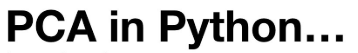

In [1]:
# -------------------------------------------
# Step 1. Import required libraries and create dataset
# -------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the dataset (same as used in the manual PCA example)
data = {
    'Hours_Studied': [2, 3, 6, 8],
    'Attendance': [40, 60, 75, 90]
}

df = pd.DataFrame(data)
print("Original Data:")
display(df)


Original Data:


,Hours_Studied,Attendance
0,2,40
1,3,60
2,6,75
3,8,90


In [2]:
# -------------------------------------------
# Step 2. Center the features (mean = 0 for each column)
# -------------------------------------------

# Subtract column means to center the data
Z = df - df.mean()

print("Centered Data (Z):")
display(Z)

# Verify that means are now ~0
print("Column Means after Centering:")
print(Z.mean())


Centered Data (Z):


,Hours_Studied,Attendance
0,-2.75,-26.25
1,-1.75,-6.25
2,1.25,8.75
3,3.25,23.75


Column Means after Centering:
Hours_Studied    0.0
Attendance       0.0
dtype: float64


In [3]:
# -------------------------------------------
# Step 3. Compute covariance matrix and eigen decomposition
# -------------------------------------------

# Covariance matrix Σ = (1 / (n - 1)) * ZᵀZ
Sigma = np.cov(Z.T, bias=False)
print("Covariance Matrix (Σ):\n", Sigma)

# Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(Sigma)

# Sort eigenvalues/eigenvectors in descending order
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# Format NumPy output for readability
np.set_printoptions(precision=4, suppress=True)

print("\nEigenvalues (λ):")
print(np.round(eig_vals, 4))

print("\nEigenvectors (v):")
print(np.round(eig_vecs, 4))

# Explained variance ratios
EVR = eig_vals / np.sum(eig_vals)
print("\nExplained Variance Ratios (EVR):")
print(np.round(EVR, 4))


Covariance Matrix (Σ):
 [[  7.58333333  57.08333333]
 [ 57.08333333 456.25      ]]

Eigenvalues (λ):
[463.3987   0.4346]

Eigenvectors (v):
[[-0.1243 -0.9922]
 [-0.9922  0.1243]]

Explained Variance Ratios (EVR):
[0.9991 0.0009]


In [5]:
# -------------------------------------------
# Step 4. Project data onto principal components
# -------------------------------------------

# Convert centered data to NumPy array
Z_mat = Z.values

# Project onto eigenvectors
PC_scores = Z_mat @ eig_vecs

# Create DataFrame of PC scores
df_proj = pd.DataFrame(PC_scores, columns=['PC1', 'PC2'])
print("Projected Data in Principal Component Space:")
display(df_proj)

# Combine with original data for reference
df_combined = pd.concat([df, df_proj], axis=1)
display(df_combined)


Projected Data in Principal Component Space:


,PC1,PC2
0,26.388268,-0.533213
1,6.419018,0.959794
2,-8.837510,-0.153012
3,-23.969776,-0.273569


,Hours_Studied,Attendance,PC1,PC2
0,2,40,26.388268,-0.533213
1,3,60,6.419018,0.959794
2,6,75,-8.837510,-0.153012
3,8,90,-23.969776,-0.273569


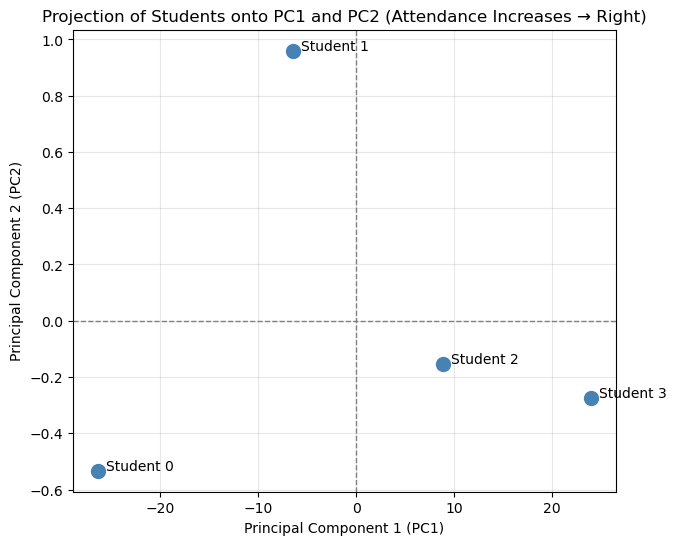

In [6]:
# -------------------------------------------
# Step 5. Visualize PC1 and PC2 (corrected orientation and student indexing)
# -------------------------------------------

# Ensure student labels start from 0, matching DataFrame index
df_proj.index = range(len(df_proj))  # labels: 0, 1, 2, 3

# Flip PC1 axis if it's negatively correlated with Attendance
# This ensures higher attendance appears on the right side of the plot.
if np.corrcoef(df['Attendance'], df_proj['PC1'])[0, 1] < 0:
    df_proj['PC1'] *= -1

# Plot the students in PC1–PC2 space
plt.figure(figsize=(7,6))
plt.scatter(df_proj['PC1'], df_proj['PC2'], color='steelblue', s=100)

# Draw reference axes
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Annotate each student by index (0, 1, 2, 3)
for i, (x, y) in enumerate(zip(df_proj['PC1'], df_proj['PC2'])):
    plt.text(x + 0.8, y, f"Student {i}", fontsize=10)

plt.title("Projection of Students onto PC1 and PC2 (Attendance Increases → Right)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.grid(alpha=0.3)
plt.show()


### Interpreting the PCA Visualization (Unstandardized Data, Axis Aligned)

This plot shows the four students projected onto the first two principal components (PC1 and PC2).  
The horizontal direction (PC1) has been **flipped, if necessary**, so that students with **higher attendance appear to the right** — aligning the visualization with logical intuition.

---

#### 1. What the Axes Mean

- **Principal Component 1 (PC1)** lies along the direction of **maximum variance** in the data.  
  In our dataset, PC1 is dominated by **Attendance**, which varies on a much larger numeric scale (0–100) than Hours Studied (1–10).  
  Movement along PC1 therefore reflects differences in Attendance — students farther to the right attended more frequently.

- **Principal Component 2 (PC2)** captures the next-largest variance and is **orthogonal** to PC1.  
  It represents minor variations that remain once the Attendance-related variance is accounted for — such as small mismatches between study hours and attendance.

---

#### 2. Observations from the Plot

- **Student 0 (leftmost)** shows the **lowest Attendance** and fewer study hours.  
- **Student 3 (rightmost)** has the **highest Attendance** and higher study commitment.  
- **Students 1 and 2** fall between them, showing moderate attendance and study behavior.

The horizontal ordering of students along PC1 matches their real Attendance levels.  
This confirms that PC1 captures nearly all of the meaningful variability in the dataset.

---

#### 3. Why the Axis May Need Flipping

Mathematically, PCA directions are **unique up to sign**.  
This means that the principal component vector \( v \) and its flipped version \(-v\) describe the *same axis* of variance.  
Flipping one simply mirrors the coordinate system — it doesn’t change the relationships or variance captured.

In our visualization, we flipped PC1 if it was negatively correlated with Attendance so that **higher Attendance appears to the right**.  
This makes the plot easier to interpret without altering any mathematical result.

---

#### 4. Why PC2 Appears Small

The vertical spread (along PC2) is minimal because the **second eigenvalue (λ₂ ≈ 0.4)** is very small.  
This indicates that PC2 explains less than 0.1% of the total variance — practically negligible for this dataset.

---

#### 5. What We Learn

- The PCA projection effectively **compresses** the two correlated features (Hours and Attendance) into one dominant component, PC1.  
- This simplification keeps almost all information intact — our earlier calculation showed that  
  **EVR₁ ≈ 0.999**, meaning PC1 alone explains more than 99.9% of the total variance.
- The result illustrates a key PCA principle: **the scale of features determines dominance**.  
  Attendance contributes more simply because it spans a larger numeric range.  
  Standardizing the data before PCA would balance the influence of both variables.

---

**Summary:**  
This visualization aligns perfectly with our theoretical results.  
- PC1 represents the main axis of variation — driven by Attendance — now oriented so that higher Attendance appears to the right.  
- PC2 contributes almost nothing, confirming that the dataset’s structure is essentially one-dimensional.  
PCA has successfully revealed that a single feature explains nearly all the variation among these students.
